In [1]:
import cv2
from keras.models import load_model
# import matplotlib.pylab as plt
from matplotlib import pyplot as plt
import numpy as np
import os
import PIL.Image as Image
import random as python_random
from sklearn import metrics
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras







In [2]:
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [3]:
# data_dir = 'data' 

train_dir = './augmentedData/Train'
test_dir = './augmentedData/Test'


In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [6]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [7]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=4000)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=16, image_size=(224, 224),)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(224, 224), shuffle=True, batch_size=120)

Found 4000 files belonging to 4 classes.
Found 4000 files belonging to 4 classes.
Found 120 files belonging to 4 classes.


2022-11-20 22:12:59.322765: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
for element in total_train_data.as_numpy_iterator(): 
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

2022-11-20 22:12:59.562104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.581490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.602051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.615918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.634773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.693558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.717130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.718507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:12:59.737655: W tensorflow/core/lib/png/png_io.cc:88] PNG 

{0: 1000, 1: 1000, 2: 1000, 3: 1000}

In [9]:
for element in test_data.as_numpy_iterator():         
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 30, 1: 24, 2: 38, 3: 28}

In [10]:
train_iterator = train_data.as_numpy_iterator()
test_iterator = test_data.as_numpy_iterator()

In [11]:
train_batch = train_iterator.next()
test_batch = test_iterator.next()

# Visualise train test en val data

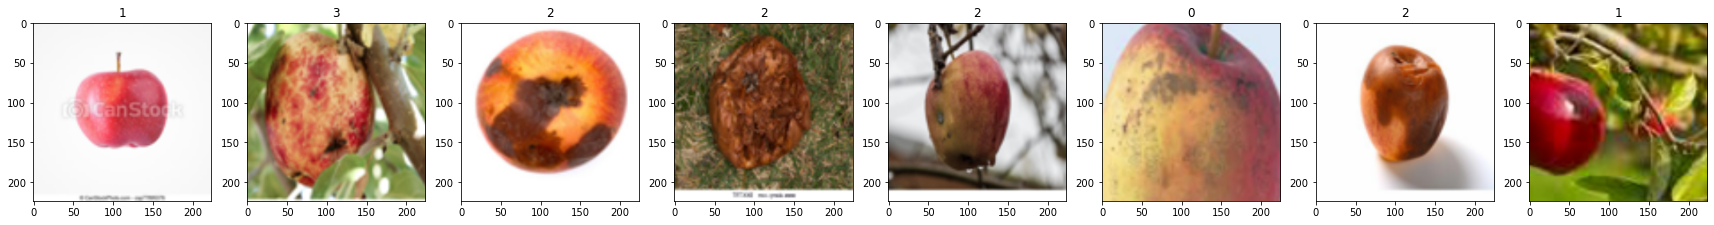

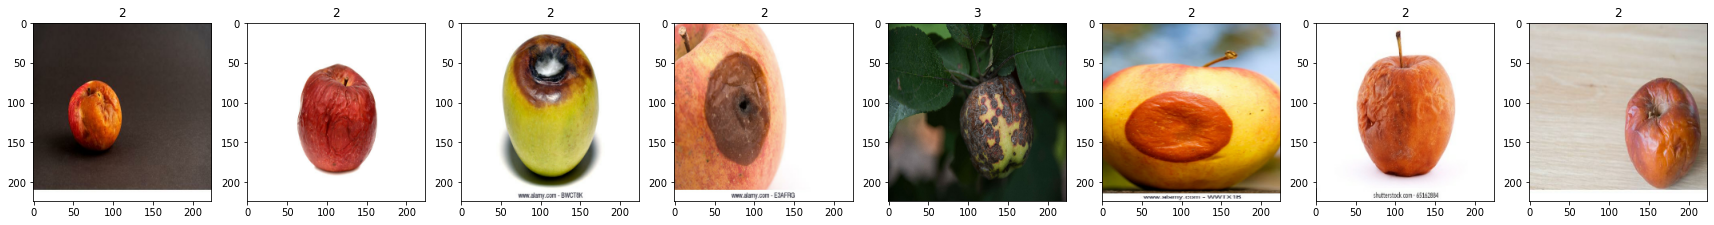

In [12]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(test_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])


# Scale data

In [13]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [14]:
train_data.as_numpy_iterator().next()
test_data.as_numpy_iterator().next()

(array([[[[0.9254902 , 0.9372549 , 0.9647059 ],
          [0.9260067 , 0.9377714 , 0.96522236],
          [0.92941177, 0.9411765 , 0.96862745],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.9254902 , 0.9372549 , 0.9647059 ],
          [0.9272835 , 0.93904823, 0.9664992 ],
          [0.92941177, 0.9411765 , 0.96862745],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.9254902 , 0.9372549 , 0.9647059 ],
          [0.92941177, 0.9411765 , 0.96862745],
          [0.92941177, 0.9411765 , 0.96862745],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.38455883, 0.38455883, 0.38455883],
          [0.99215

# split data

In [15]:
imageCountTrain = len(train_data)
print (imageCountTrain) # is 125 batches van 32 dus alle 4000
imageCountTest = len(test_data) # is 1 batch van 120
print (imageCountTest)

250
1


In [16]:
train_size = int(len(train_data)*.9)
val_size = int(len(train_data)*.1)
test_size = int(len(test_data))

In [17]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# Get and test Mobilenet v2 model

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [18]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


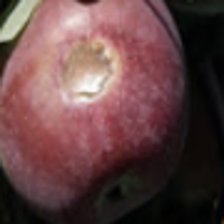

In [19]:
apple = Image.open("./augmentedData/Train/Normal_Apple/Normal_Apple_original_Normal_Apple1.jpg_51055edc-2072-4a14-bc82-9e0f8e0321ba.png").resize(IMAGE_SHAPE)
apple


In [20]:
apple = np.array(apple)/255.0
apple.shape


(224, 224, 3)

In [21]:
apple[np.newaxis, ...]

array([[[[0.06666667, 0.07058824, 0.06666667],
         [0.05882353, 0.0627451 , 0.05882353],
         [0.03921569, 0.04705882, 0.04705882],
         ...,
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608]],

        [[0.06666667, 0.07058824, 0.06666667],
         [0.05882353, 0.0627451 , 0.05882353],
         [0.03921569, 0.04705882, 0.04705882],
         ...,
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608],
         [0.09411765, 0.11764706, 0.09019608]],

        [[0.06666667, 0.06666667, 0.0627451 ],
         [0.05882353, 0.05882353, 0.05490196],
         [0.03921569, 0.04313725, 0.04313725],
         ...,
         [0.09803922, 0.12156863, 0.09411765],
         [0.09803922, 0.12156863, 0.09411765],
         [0.09803922, 0.12156863, 0.09411765]],

        ...,

        [[0.02352941, 0.03137255, 0.01568627],
         [0.02352941, 0.03137255, 0.01176471]

In [22]:
result = classifier.predict(apple[np.newaxis, ...])
result.shape

(1, 1001)

In [23]:
predicted_label_index = np.argmax(result)
predicted_label_index

958

In [24]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("./ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [25]:
image_labels[predicted_label_index]

'pomegranate'

# retrain using the apples

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [27]:
num_of_apples = 4 # to set final layer

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_apples)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25


2022-11-20 22:13:10.350148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:10.370491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:10.377068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 43s - loss: 1.5641 - acc: 0.3854

2022-11-20 22:13:11.674213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 42s - loss: 1.5065 - acc: 0.3889

2022-11-20 22:13:12.464875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 40s - loss: 1.4707 - acc: 0.3850

2022-11-20 22:13:15.572222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 40s - loss: 1.4671 - acc: 0.3750

2022-11-20 22:13:15.965659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 39s - loss: 1.4486 - acc: 0.3603

2022-11-20 22:13:17.675658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:17.676721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 38s - loss: 1.4348 - acc: 0.3615

2022-11-20 22:13:18.314473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 36s - loss: 1.3719 - acc: 0.3828

2022-11-20 22:13:22.793153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 35s - loss: 1.3593 - acc: 0.3909

2022-11-20 22:13:23.191398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 35s - loss: 1.3512 - acc: 0.3924

2022-11-20 22:13:23.586897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 28s - loss: 1.2886 - acc: 0.4162

2022-11-20 22:13:28.989246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 28s - loss: 1.2778 - acc: 0.4238

2022-11-20 22:13:29.561248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 27s - loss: 1.2724 - acc: 0.4243

2022-11-20 22:13:30.326496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 25s - loss: 1.2581 - acc: 0.4363

2022-11-20 22:13:31.495392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 24s - loss: 1.2453 - acc: 0.4428

2022-11-20 22:13:32.859150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 24s - loss: 1.2442 - acc: 0.4439

2022-11-20 22:13:33.075955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 23s - loss: 1.2353 - acc: 0.4498

2022-11-20 22:13:33.885451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 19s - loss: 1.1999 - acc: 0.4731

2022-11-20 22:13:37.205356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 18s - loss: 1.1931 - acc: 0.4770

2022-11-20 22:13:37.769413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 17s - loss: 1.1773 - acc: 0.4879

2022-11-20 22:13:39.337296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:39.339974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 16s - loss: 1.1681 - acc: 0.4944

2022-11-20 22:13:40.181482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:40.367863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 14s - loss: 1.1483 - acc: 0.5065

2022-11-20 22:13:42.284861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 13s - loss: 1.1379 - acc: 0.5133

2022-11-20 22:13:43.409906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 11s - loss: 1.1276 - acc: 0.5223

2022-11-20 22:13:45.002426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 10s - loss: 1.1189 - acc: 0.5255

2022-11-20 22:13:46.162512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 1.0920 - acc: 0.5427

2022-11-20 22:13:49.196434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:49.196987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 1.0725 - acc: 0.5562

2022-11-20 22:13:51.494509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 1.0332 - acc: 0.5792

2022-11-20 22:13:56.907405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:56.921906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:56.926646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:56.950906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:56.961144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:57.000917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:57.007131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:57.031461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:13:57.031613: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 55s 234ms/step - loss: 1.0332 - acc: 0.5792 - val_loss: 0.7070 - val_acc: 0.7800
Epoch 2/25


2022-11-20 22:14:03.335569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:03.362765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:03.373959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 44s - loss: 0.6194 - acc: 0.8125

2022-11-20 22:14:04.450625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 44s - loss: 0.6234 - acc: 0.8125

2022-11-20 22:14:05.278493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 46s - loss: 0.6563 - acc: 0.7900

2022-11-20 22:14:09.075057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 45s - loss: 0.6649 - acc: 0.7847

2022-11-20 22:14:09.460916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 42s - loss: 0.6443 - acc: 0.7964

2022-11-20 22:14:11.022985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:11.025689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 41s - loss: 0.6403 - acc: 0.7993

2022-11-20 22:14:11.599414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 34s - loss: 0.6454 - acc: 0.7961

2022-11-20 22:14:15.010493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 34s - loss: 0.6406 - acc: 0.8019

2022-11-20 22:14:15.365965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 33s - loss: 0.6434 - acc: 0.8012

2022-11-20 22:14:15.730201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 27s - loss: 0.6412 - acc: 0.8033

2022-11-20 22:14:20.761301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 26s - loss: 0.6391 - acc: 0.8036

2022-11-20 22:14:21.477491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 26s - loss: 0.6392 - acc: 0.8032

2022-11-20 22:14:22.370334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 25s - loss: 0.6381 - acc: 0.8014

2022-11-20 22:14:23.765450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 23s - loss: 0.6343 - acc: 0.8032

2022-11-20 22:14:25.084510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:25.273260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 22s - loss: 0.6310 - acc: 0.8053

2022-11-20 22:14:26.012061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 19s - loss: 0.6254 - acc: 0.8077

2022-11-20 22:14:29.651022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 18s - loss: 0.6234 - acc: 0.8087

2022-11-20 22:14:30.262638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 17s - loss: 0.6218 - acc: 0.8071

2022-11-20 22:14:31.964349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:31.972106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 16s - loss: 0.6206 - acc: 0.8082

2022-11-20 22:14:32.749796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:32.931166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 14s - loss: 0.6181 - acc: 0.8081

2022-11-20 22:14:35.059687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 13s - loss: 0.6161 - acc: 0.8082

2022-11-20 22:14:36.335565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 12s - loss: 0.6123 - acc: 0.8095

2022-11-20 22:14:38.241725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 10s - loss: 0.6114 - acc: 0.8092

2022-11-20 22:14:39.893195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 0.6041 - acc: 0.8112

2022-11-20 22:14:43.465873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:43.465916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.5982 - acc: 0.8141

2022-11-20 22:14:46.233678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.5848 - acc: 0.8194

2022-11-20 22:14:52.350717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.368270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.375367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.407656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.421782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.473467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.480705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.502811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:52.504783: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 56s 249ms/step - loss: 0.5848 - acc: 0.8194 - val_loss: 0.4863 - val_acc: 0.8600
Epoch 3/25
  1/225 [..............................] - ETA: 57s - loss: 0.4122 - acc: 0.8750

2022-11-20 22:14:59.407807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:59.427763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:14:59.436385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 54s - loss: 0.3936 - acc: 0.9125

2022-11-20 22:15:00.601260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 53s - loss: 0.4034 - acc: 0.9028

2022-11-20 22:15:01.605846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 48s - loss: 0.4506 - acc: 0.8646

2022-11-20 22:15:05.197597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 48s - loss: 0.4426 - acc: 0.8702

2022-11-20 22:15:05.772052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 45s - loss: 0.4526 - acc: 0.8714

2022-11-20 22:15:07.582101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:07.583534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 44s - loss: 0.4487 - acc: 0.8734

2022-11-20 22:15:08.177891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 40s - loss: 0.4498 - acc: 0.8728

2022-11-20 22:15:12.816384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 40s - loss: 0.4490 - acc: 0.8739

2022-11-20 22:15:13.430003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 40s - loss: 0.4471 - acc: 0.8750

2022-11-20 22:15:13.978162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 32s - loss: 0.4500 - acc: 0.8700

2022-11-20 22:15:19.966674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.4502 - acc: 0.8708

2022-11-20 22:15:20.606485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 30s - loss: 0.4517 - acc: 0.8671

2022-11-20 22:15:21.536572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 28s - loss: 0.4535 - acc: 0.8651

2022-11-20 22:15:22.808781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.4562 - acc: 0.8616

2022-11-20 22:15:24.174615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.4566 - acc: 0.8605

2022-11-20 22:15:24.388195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 25s - loss: 0.4548 - acc: 0.8617

2022-11-20 22:15:25.298854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 21s - loss: 0.4472 - acc: 0.8648

2022-11-20 22:15:28.907431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 20s - loss: 0.4492 - acc: 0.8633

2022-11-20 22:15:29.535877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.4515 - acc: 0.8621

2022-11-20 22:15:31.195169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:31.197133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.4525 - acc: 0.8611

2022-11-20 22:15:32.053166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/225 [==================>...........] - ETA: 17s - loss: 0.4510 - acc: 0.8622

2022-11-20 22:15:32.264151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 15s - loss: 0.4484 - acc: 0.8620

2022-11-20 22:15:33.946423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.4501 - acc: 0.8598

2022-11-20 22:15:35.006838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 12s - loss: 0.4492 - acc: 0.8608

2022-11-20 22:15:36.672571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.4446 - acc: 0.8631

2022-11-20 22:15:38.081250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 8s - loss: 0.4408 - acc: 0.8634

2022-11-20 22:15:41.837686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:41.838479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.4413 - acc: 0.8631

2022-11-20 22:15:44.560918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.4343 - acc: 0.8669

2022-11-20 22:15:51.109950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.126961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.134290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.173524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.191025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.245976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.255623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.283690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:51.283858: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 58s 259ms/step - loss: 0.4343 - acc: 0.8669 - val_loss: 0.3894 - val_acc: 0.8800
Epoch 4/25


2022-11-20 22:15:57.688446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:57.712662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:15:57.717615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 50s - loss: 0.3022 - acc: 0.9750

2022-11-20 22:15:58.869157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 49s - loss: 0.2790 - acc: 0.9583

2022-11-20 22:15:59.797346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 43s - loss: 0.3412 - acc: 0.9150

2022-11-20 22:16:03.019030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 43s - loss: 0.3339 - acc: 0.9167

2022-11-20 22:16:03.455188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 40s - loss: 0.3424 - acc: 0.9143

2022-11-20 22:16:05.072110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:05.073549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 40s - loss: 0.3470 - acc: 0.9112

2022-11-20 22:16:05.684261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 35s - loss: 0.3581 - acc: 0.9057

2022-11-20 22:16:09.542734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 34s - loss: 0.3570 - acc: 0.9068

2022-11-20 22:16:09.951696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 34s - loss: 0.3545 - acc: 0.9083

2022-11-20 22:16:10.360950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 28s - loss: 0.3595 - acc: 0.8991

2022-11-20 22:16:15.971356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 28s - loss: 0.3632 - acc: 0.8958

2022-11-20 22:16:16.604422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 27s - loss: 0.3639 - acc: 0.8967

2022-11-20 22:16:17.443437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 26s - loss: 0.3678 - acc: 0.8917

2022-11-20 22:16:18.970565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 25s - loss: 0.3662 - acc: 0.8949

2022-11-20 22:16:20.428448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/225 [=============>................] - ETA: 24s - loss: 0.3645 - acc: 0.8956

2022-11-20 22:16:20.660225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 23s - loss: 0.3627 - acc: 0.8960

2022-11-20 22:16:21.514378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 20s - loss: 0.3565 - acc: 0.8978

2022-11-20 22:16:25.507840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 20s - loss: 0.3559 - acc: 0.8973

2022-11-20 22:16:26.207031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 18s - loss: 0.3580 - acc: 0.8951

2022-11-20 22:16:28.159584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:28.161519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 17s - loss: 0.3562 - acc: 0.8963

2022-11-20 22:16:29.124114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 17s - loss: 0.3577 - acc: 0.8957

2022-11-20 22:16:29.342003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 15s - loss: 0.3573 - acc: 0.8957

2022-11-20 22:16:31.384824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.3598 - acc: 0.8938

2022-11-20 22:16:32.520858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 12s - loss: 0.3604 - acc: 0.8918

2022-11-20 22:16:34.312698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.3595 - acc: 0.8927

2022-11-20 22:16:35.661529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.3590 - acc: 0.8930

2022-11-20 22:16:39.914521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:39.914958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.3576 - acc: 0.8929

2022-11-20 22:16:42.708770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.3499 - acc: 0.8950

2022-11-20 22:16:48.045680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.059709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.065703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.095924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.107906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.162947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.168584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.191265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:48.191298: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 56s 251ms/step - loss: 0.3499 - acc: 0.8950 - val_loss: 0.3474 - val_acc: 0.8800
Epoch 5/25


2022-11-20 22:16:54.193237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:54.204287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:16:54.212347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 50s - loss: 0.2673 - acc: 0.9500

2022-11-20 22:16:55.400478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 47s - loss: 0.2555 - acc: 0.9438

2022-11-20 22:16:56.291773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 45s - loss: 0.2824 - acc: 0.9271

2022-11-20 22:16:59.641326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 45s - loss: 0.2826 - acc: 0.9255

2022-11-20 22:17:00.181211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 42s - loss: 0.3013 - acc: 0.9143

2022-11-20 22:17:01.956192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:01.958410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 41s - loss: 0.2963 - acc: 0.9211

2022-11-20 22:17:02.584791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 37s - loss: 0.2985 - acc: 0.9208

2022-11-20 22:17:06.808783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 37s - loss: 0.2976 - acc: 0.9216

2022-11-20 22:17:07.250238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 36s - loss: 0.2984 - acc: 0.9208

2022-11-20 22:17:07.674049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 30s - loss: 0.3012 - acc: 0.9174

2022-11-20 22:17:13.499735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 29s - loss: 0.3022 - acc: 0.9153

2022-11-20 22:17:14.148117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 28s - loss: 0.3033 - acc: 0.9142

2022-11-20 22:17:14.987379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 27s - loss: 0.3047 - acc: 0.9131

2022-11-20 22:17:16.304543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 26s - loss: 0.3029 - acc: 0.9141

2022-11-20 22:17:18.049567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.3031 - acc: 0.9144

2022-11-20 22:17:18.312093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 24s - loss: 0.3031 - acc: 0.9121

2022-11-20 22:17:19.252704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 21s - loss: 0.3025 - acc: 0.9133

2022-11-20 22:17:22.807931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 20s - loss: 0.3033 - acc: 0.9131

2022-11-20 22:17:23.484950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 18s - loss: 0.3010 - acc: 0.9122

2022-11-20 22:17:25.114475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:25.116065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 17s - loss: 0.3036 - acc: 0.9108

2022-11-20 22:17:25.951847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:26.150610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 15s - loss: 0.3024 - acc: 0.9111

2022-11-20 22:17:28.107036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 14s - loss: 0.3038 - acc: 0.9108

2022-11-20 22:17:29.287330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 12s - loss: 0.3022 - acc: 0.9103

2022-11-20 22:17:31.186787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 11s - loss: 0.3008 - acc: 0.9109

2022-11-20 22:17:32.423242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.3011 - acc: 0.9106

2022-11-20 22:17:35.573910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:35.574752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.2987 - acc: 0.9121

2022-11-20 22:17:37.857865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.2957 - acc: 0.9131

2022-11-20 22:17:43.376872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.386921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.392027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.414764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.424848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.467523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.472059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.495130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:43.495284: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 55s 246ms/step - loss: 0.2957 - acc: 0.9131 - val_loss: 0.2734 - val_acc: 0.9175
Epoch 6/25


2022-11-20 22:17:49.725286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:49.753120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:49.759585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 52s - loss: 0.2016 - acc: 0.9750

2022-11-20 22:17:50.908795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 51s - loss: 0.2090 - acc: 0.9653

2022-11-20 22:17:51.871119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 46s - loss: 0.2648 - acc: 0.9323

2022-11-20 22:17:55.288265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 46s - loss: 0.2664 - acc: 0.9351

2022-11-20 22:17:55.748346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 45s - loss: 0.2623 - acc: 0.9357

2022-11-20 22:17:57.799520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:17:57.809402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 44s - loss: 0.2576 - acc: 0.9341

2022-11-20 22:17:58.471740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 39s - loss: 0.2613 - acc: 0.9320

2022-11-20 22:18:02.767499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 38s - loss: 0.2594 - acc: 0.9332

2022-11-20 22:18:03.195493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.2557 - acc: 0.9344

2022-11-20 22:18:03.646882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 31s - loss: 0.2528 - acc: 0.9382

2022-11-20 22:18:09.366617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 30s - loss: 0.2560 - acc: 0.9361

2022-11-20 22:18:10.020457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 29s - loss: 0.2565 - acc: 0.9342

2022-11-20 22:18:10.867302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.2603 - acc: 0.9287

2022-11-20 22:18:12.207092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 26s - loss: 0.2589 - acc: 0.9305

2022-11-20 22:18:13.826114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.2581 - acc: 0.9311

2022-11-20 22:18:14.062928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 25s - loss: 0.2597 - acc: 0.9302

2022-11-20 22:18:15.001246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 21s - loss: 0.2568 - acc: 0.9331

2022-11-20 22:18:18.590929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 20s - loss: 0.2580 - acc: 0.9328

2022-11-20 22:18:19.250847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 18s - loss: 0.2605 - acc: 0.9317

2022-11-20 22:18:20.883012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:20.886563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 17s - loss: 0.2599 - acc: 0.9315

2022-11-20 22:18:21.755899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:21.958122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 15s - loss: 0.2586 - acc: 0.9310

2022-11-20 22:18:23.748791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 14s - loss: 0.2605 - acc: 0.9300

2022-11-20 22:18:24.827508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 12s - loss: 0.2615 - acc: 0.9296

2022-11-20 22:18:26.602028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 11s - loss: 0.2575 - acc: 0.9314

2022-11-20 22:18:27.881165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.2605 - acc: 0.9302

2022-11-20 22:18:31.087881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:31.088616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.2580 - acc: 0.9306

2022-11-20 22:18:33.334562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.2558 - acc: 0.9306

2022-11-20 22:18:38.499377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.511560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.516672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.542462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.551212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.593160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.599242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.623213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:38.623533: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 54s 240ms/step - loss: 0.2558 - acc: 0.9306 - val_loss: 0.2521 - val_acc: 0.9300
Epoch 7/25


2022-11-20 22:18:43.939211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:43.950959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:43.956775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 42s - loss: 0.1553 - acc: 0.9896

2022-11-20 22:18:44.928752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 41s - loss: 0.1633 - acc: 0.9750

2022-11-20 22:18:45.711380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 38s - loss: 0.2196 - acc: 0.9425

2022-11-20 22:18:48.633524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 38s - loss: 0.2170 - acc: 0.9444

2022-11-20 22:18:49.018114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 36s - loss: 0.2207 - acc: 0.9464

2022-11-20 22:18:50.570162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:18:50.572424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 36s - loss: 0.2147 - acc: 0.9507

2022-11-20 22:18:51.158681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 32s - loss: 0.2255 - acc: 0.9408

2022-11-20 22:18:54.854627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 32s - loss: 0.2219 - acc: 0.9428

2022-11-20 22:18:55.229484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 31s - loss: 0.2188 - acc: 0.9447

2022-11-20 22:18:55.612050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 26s - loss: 0.2248 - acc: 0.9439

2022-11-20 22:19:00.704437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 25s - loss: 0.2240 - acc: 0.9444

2022-11-20 22:19:01.278879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 25s - loss: 0.2261 - acc: 0.9421

2022-11-20 22:19:02.082823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 23s - loss: 0.2268 - acc: 0.9418

2022-11-20 22:19:03.220238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 22s - loss: 0.2297 - acc: 0.9410

2022-11-20 22:19:04.571297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:04.757649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 21s - loss: 0.2277 - acc: 0.9414

2022-11-20 22:19:05.555740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 18s - loss: 0.2251 - acc: 0.9433

2022-11-20 22:19:09.057015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 17s - loss: 0.2245 - acc: 0.9436

2022-11-20 22:19:09.706441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 16s - loss: 0.2262 - acc: 0.9424

2022-11-20 22:19:11.301044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:11.302769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 15s - loss: 0.2253 - acc: 0.9431

2022-11-20 22:19:12.075181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:12.266328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 13s - loss: 0.2267 - acc: 0.9419

2022-11-20 22:19:14.060360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 12s - loss: 0.2267 - acc: 0.9418

2022-11-20 22:19:15.047759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 11s - loss: 0.2254 - acc: 0.9408

2022-11-20 22:19:16.588346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 9s - loss: 0.2267 - acc: 0.9400 

2022-11-20 22:19:17.797158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 0.2277 - acc: 0.9415

2022-11-20 22:19:20.707502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:20.707811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 4s - loss: 0.2257 - acc: 0.9419

2022-11-20 22:19:22.903148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.2249 - acc: 0.9417

2022-11-20 22:19:27.634273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.645650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.650360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.672267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.683832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.721809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.726995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.747647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:27.747952: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 49s 216ms/step - loss: 0.2249 - acc: 0.9417 - val_loss: 0.2266 - val_acc: 0.9475
Epoch 8/25
  1/225 [..............................] - ETA: 53s - loss: 0.1988 - acc: 0.9375

2022-11-20 22:19:32.592876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:32.604061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:32.609118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 42s - loss: 0.1959 - acc: 0.9583

2022-11-20 22:19:33.572663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 41s - loss: 0.1689 - acc: 0.9688

2022-11-20 22:19:34.331808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 37s - loss: 0.1820 - acc: 0.9525

2022-11-20 22:19:37.125824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 37s - loss: 0.1878 - acc: 0.9514

2022-11-20 22:19:37.490824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 35s - loss: 0.1931 - acc: 0.9482

2022-11-20 22:19:38.994883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:19:38.998131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 35s - loss: 0.1897 - acc: 0.9507

2022-11-20 22:19:39.556448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 31s - loss: 0.2004 - acc: 0.9496

2022-11-20 22:19:43.036634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 30s - loss: 0.1989 - acc: 0.9513

2022-11-20 22:19:43.405816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 30s - loss: 0.1990 - acc: 0.9518

2022-11-20 22:19:43.790549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 25s - loss: 0.1976 - acc: 0.9538

2022-11-20 22:19:48.848134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 25s - loss: 0.1953 - acc: 0.9540

2022-11-20 22:19:49.415724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 24s - loss: 0.1968 - acc: 0.9533

2022-11-20 22:19:50.219161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 23s - loss: 0.1998 - acc: 0.9517

2022-11-20 22:19:51.367082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 22s - loss: 0.1995 - acc: 0.9509

2022-11-20 22:19:53.007358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 22s - loss: 0.2003 - acc: 0.9508

2022-11-20 22:19:53.259468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 21s - loss: 0.2015 - acc: 0.9498

2022-11-20 22:19:54.357412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 19s - loss: 0.1962 - acc: 0.9530

2022-11-20 22:19:58.315217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 18s - loss: 0.1990 - acc: 0.9521

2022-11-20 22:19:59.085629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 16s - loss: 0.2007 - acc: 0.9517

2022-11-20 22:20:00.829318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:00.834317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 16s - loss: 0.2011 - acc: 0.9517

2022-11-20 22:20:01.637659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:01.835354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 14s - loss: 0.1990 - acc: 0.9536

2022-11-20 22:20:03.662359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 13s - loss: 0.1998 - acc: 0.9535

2022-11-20 22:20:04.666213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 11s - loss: 0.2011 - acc: 0.9524

2022-11-20 22:20:06.244388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 10s - loss: 0.2004 - acc: 0.9526

2022-11-20 22:20:07.410827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 0.2008 - acc: 0.9521

2022-11-20 22:20:10.431944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:10.432509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.1993 - acc: 0.9522

2022-11-20 22:20:12.604039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1976 - acc: 0.9528

2022-11-20 22:20:17.851152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.863158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.868388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.894428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.904383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.948689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.952865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.979161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:17.979977: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 51s 226ms/step - loss: 0.1976 - acc: 0.9528 - val_loss: 0.2057 - val_acc: 0.9525
Epoch 9/25


2022-11-20 22:20:23.482675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:23.502206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:23.509144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 47s - loss: 0.1370 - acc: 0.9875

2022-11-20 22:20:24.585752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 45s - loss: 0.1395 - acc: 0.9792

2022-11-20 22:20:25.415240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 43s - loss: 0.1712 - acc: 0.9557

2022-11-20 22:20:28.646991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 42s - loss: 0.1707 - acc: 0.9567

2022-11-20 22:20:29.084517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 40s - loss: 0.1848 - acc: 0.9467

2022-11-20 22:20:30.770674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:30.772148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 40s - loss: 0.1780 - acc: 0.9510

2022-11-20 22:20:31.395369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 35s - loss: 0.1792 - acc: 0.9550

2022-11-20 22:20:35.370007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 35s - loss: 0.1778 - acc: 0.9558

2022-11-20 22:20:35.771287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 34s - loss: 0.1764 - acc: 0.9570

2022-11-20 22:20:36.183393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 28s - loss: 0.1768 - acc: 0.9616

2022-11-20 22:20:41.543425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 27s - loss: 0.1756 - acc: 0.9615

2022-11-20 22:20:42.145119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 26s - loss: 0.1767 - acc: 0.9605

2022-11-20 22:20:42.940054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 25s - loss: 0.1783 - acc: 0.9598

2022-11-20 22:20:44.146675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 24s - loss: 0.1799 - acc: 0.9589

2022-11-20 22:20:45.551382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:45.750577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 23s - loss: 0.1779 - acc: 0.9602

2022-11-20 22:20:46.561326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 19s - loss: 0.1766 - acc: 0.9615

2022-11-20 22:20:49.889085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 18s - loss: 0.1758 - acc: 0.9619

2022-11-20 22:20:50.481677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 17s - loss: 0.1794 - acc: 0.9583

2022-11-20 22:20:52.066767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:52.069513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 16s - loss: 0.1780 - acc: 0.9595

2022-11-20 22:20:52.879998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:20:53.084375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 14s - loss: 0.1762 - acc: 0.9609

2022-11-20 22:20:54.874454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 13s - loss: 0.1766 - acc: 0.9605

2022-11-20 22:20:55.865261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 11s - loss: 0.1762 - acc: 0.9606

2022-11-20 22:20:57.432884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 10s - loss: 0.1764 - acc: 0.9594

2022-11-20 22:20:58.592530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 0.1796 - acc: 0.9587

2022-11-20 22:21:01.558468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:01.562098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.1789 - acc: 0.9589

2022-11-20 22:21:03.771354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1787 - acc: 0.9586

2022-11-20 22:21:08.985098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:08.996456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.002442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.026559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.036579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.079948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.088542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.110793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:09.111797: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 51s 227ms/step - loss: 0.1787 - acc: 0.9586 - val_loss: 0.1779 - val_acc: 0.9575
Epoch 10/25


2022-11-20 22:21:14.648677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:14.679112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:14.693793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 49s - loss: 0.1347 - acc: 0.9750

2022-11-20 22:21:15.784307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 46s - loss: 0.1309 - acc: 0.9750

2022-11-20 22:21:16.638378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 42s - loss: 0.1483 - acc: 0.9675

2022-11-20 22:21:19.781386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 42s - loss: 0.1492 - acc: 0.9663

2022-11-20 22:21:20.195089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 39s - loss: 0.1553 - acc: 0.9589

2022-11-20 22:21:21.828504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:21.830646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 39s - loss: 0.1557 - acc: 0.9595

2022-11-20 22:21:22.473379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 35s - loss: 0.1556 - acc: 0.9616

2022-11-20 22:21:26.536011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 35s - loss: 0.1552 - acc: 0.9623

2022-11-20 22:21:26.952260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 34s - loss: 0.1538 - acc: 0.9635

2022-11-20 22:21:27.402901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 28s - loss: 0.1586 - acc: 0.9680

2022-11-20 22:21:33.073598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 28s - loss: 0.1602 - acc: 0.9660

2022-11-20 22:21:33.687025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 27s - loss: 0.1612 - acc: 0.9658

2022-11-20 22:21:34.505834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 26s - loss: 0.1589 - acc: 0.9675

2022-11-20 22:21:35.752368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 24s - loss: 0.1599 - acc: 0.9673

2022-11-20 22:21:37.272945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 24s - loss: 0.1593 - acc: 0.9676

2022-11-20 22:21:37.490771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 23s - loss: 0.1590 - acc: 0.9679

2022-11-20 22:21:38.306294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 19s - loss: 0.1566 - acc: 0.9688

2022-11-20 22:21:41.749524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 19s - loss: 0.1580 - acc: 0.9685

2022-11-20 22:21:42.343833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 17s - loss: 0.1581 - acc: 0.9681

2022-11-20 22:21:43.991770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:43.993422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 16s - loss: 0.1579 - acc: 0.9683

2022-11-20 22:21:44.815694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/225 [==================>...........] - ETA: 16s - loss: 0.1581 - acc: 0.9679

2022-11-20 22:21:45.026311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 14s - loss: 0.1582 - acc: 0.9685

2022-11-20 22:21:46.826807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 13s - loss: 0.1597 - acc: 0.9676

2022-11-20 22:21:47.838303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 11s - loss: 0.1606 - acc: 0.9680

2022-11-20 22:21:49.449665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 10s - loss: 0.1591 - acc: 0.9684

2022-11-20 22:21:50.656255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 7s - loss: 0.1595 - acc: 0.9673

2022-11-20 22:21:53.692792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:21:53.693431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.1598 - acc: 0.9675

2022-11-20 22:21:55.850814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1582 - acc: 0.9681

2022-11-20 22:22:01.022395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.034188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.038881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.068045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.078763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.122910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.128294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.153911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:01.154177: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 52s 231ms/step - loss: 0.1582 - acc: 0.9681 - val_loss: 0.1515 - val_acc: 0.9700
Epoch 11/25


2022-11-20 22:22:06.722990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:06.743418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:06.752006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 46s - loss: 0.1038 - acc: 0.9688

2022-11-20 22:22:07.816099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 46s - loss: 0.1065 - acc: 0.9792

2022-11-20 22:22:08.666534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 42s - loss: 0.1423 - acc: 0.9650

2022-11-20 22:22:11.817828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 41s - loss: 0.1407 - acc: 0.9663

2022-11-20 22:22:12.229533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 40s - loss: 0.1451 - acc: 0.9614

2022-11-20 22:22:14.044000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:14.050755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 41s - loss: 0.1416 - acc: 0.9645

2022-11-20 22:22:14.874934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 38s - loss: 0.1449 - acc: 0.9671

2022-11-20 22:22:19.438391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 37s - loss: 0.1461 - acc: 0.9672

2022-11-20 22:22:19.844565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 37s - loss: 0.1455 - acc: 0.9677

2022-11-20 22:22:20.265318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 30s - loss: 0.1442 - acc: 0.9727

2022-11-20 22:22:26.277277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 30s - loss: 0.1446 - acc: 0.9722

2022-11-20 22:22:26.907181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 29s - loss: 0.1462 - acc: 0.9707

2022-11-20 22:22:27.857738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 27s - loss: 0.1453 - acc: 0.9712

2022-11-20 22:22:29.092549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 26s - loss: 0.1459 - acc: 0.9714

2022-11-20 22:22:30.622438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.1457 - acc: 0.9716

2022-11-20 22:22:30.849403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 25s - loss: 0.1456 - acc: 0.9715

2022-11-20 22:22:31.831901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 21s - loss: 0.1431 - acc: 0.9724

2022-11-20 22:22:35.746436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 20s - loss: 0.1429 - acc: 0.9730

2022-11-20 22:22:36.529850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.1454 - acc: 0.9719

2022-11-20 22:22:38.428255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:38.429884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.1448 - acc: 0.9722

2022-11-20 22:22:39.485895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.1446 - acc: 0.9724

2022-11-20 22:22:39.704465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 15s - loss: 0.1431 - acc: 0.9734

2022-11-20 22:22:41.729210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.1447 - acc: 0.9723

2022-11-20 22:22:42.735832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 12s - loss: 0.1458 - acc: 0.9721

2022-11-20 22:22:44.514753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.1458 - acc: 0.9718

2022-11-20 22:22:45.815959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.1453 - acc: 0.9717

2022-11-20 22:22:49.060819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:49.060932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.1446 - acc: 0.9722

2022-11-20 22:22:51.361083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1443 - acc: 0.9714

2022-11-20 22:22:56.923598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:56.937228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:56.942700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:56.968469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:56.976590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:57.021449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:57.025734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:57.050222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:22:57.050853: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 56s 249ms/step - loss: 0.1443 - acc: 0.9714 - val_loss: 0.1450 - val_acc: 0.9750
Epoch 12/25


2022-11-20 22:23:02.855761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:02.875354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:02.883219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 49s - loss: 0.0902 - acc: 1.0000

2022-11-20 22:23:04.207613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 48s - loss: 0.1028 - acc: 0.9812

2022-11-20 22:23:05.115375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 44s - loss: 0.1220 - acc: 0.9750

2022-11-20 22:23:08.480422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 44s - loss: 0.1301 - acc: 0.9722

2022-11-20 22:23:08.930959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 45s - loss: 0.1269 - acc: 0.9750

2022-11-20 22:23:11.167536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:11.169901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 39/225 [====>.........................] - ETA: 43s - loss: 0.1248 - acc: 0.9744

2022-11-20 22:23:11.845190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 38s - loss: 0.1317 - acc: 0.9693

2022-11-20 22:23:16.012562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 38s - loss: 0.1311 - acc: 0.9703

2022-11-20 22:23:16.446877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 37s - loss: 0.1292 - acc: 0.9713

2022-11-20 22:23:16.923375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 32s - loss: 0.1302 - acc: 0.9766

2022-11-20 22:23:23.585963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 31s - loss: 0.1323 - acc: 0.9753

2022-11-20 22:23:24.333537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 30s - loss: 0.1318 - acc: 0.9757

2022-11-20 22:23:25.449259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


101/225 [============>.................] - ETA: 29s - loss: 0.1328 - acc: 0.9740

2022-11-20 22:23:26.962943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.1323 - acc: 0.9745

2022-11-20 22:23:28.553064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/225 [=============>................] - ETA: 27s - loss: 0.1328 - acc: 0.9742

2022-11-20 22:23:28.776103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 26s - loss: 0.1314 - acc: 0.9751

2022-11-20 22:23:29.683673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 22s - loss: 0.1300 - acc: 0.9760

2022-11-20 22:23:33.838958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 21s - loss: 0.1302 - acc: 0.9756

2022-11-20 22:23:34.504728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/225 [=================>............] - ETA: 19s - loss: 0.1304 - acc: 0.9754

2022-11-20 22:23:36.287088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:36.288437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.1299 - acc: 0.9759

2022-11-20 22:23:37.162776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/225 [==================>...........] - ETA: 18s - loss: 0.1300 - acc: 0.9760

2022-11-20 22:23:37.386292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


156/225 [===================>..........] - ETA: 16s - loss: 0.1303 - acc: 0.9760

2022-11-20 22:23:39.386190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 15s - loss: 0.1295 - acc: 0.9766

2022-11-20 22:23:40.498007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 13s - loss: 0.1307 - acc: 0.9762

2022-11-20 22:23:42.505394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 12s - loss: 0.1303 - acc: 0.9763

2022-11-20 22:23:43.835792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


190/225 [========================>.....] - ETA: 8s - loss: 0.1301 - acc: 0.9760

2022-11-20 22:23:47.121917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:47.122963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.1308 - acc: 0.9753

2022-11-20 22:23:49.528721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1308 - acc: 0.9744

2022-11-20 22:23:55.047781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.061338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.066296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.092057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.100981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.145037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.150544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.171619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:23:55.172741: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 58s 258ms/step - loss: 0.1308 - acc: 0.9744 - val_loss: 0.1343 - val_acc: 0.9700
Epoch 13/25


2022-11-20 22:24:00.961049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:00.981942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:00.990634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  6/225 [..............................] - ETA: 49s - loss: 0.1026 - acc: 0.9792

2022-11-20 22:24:02.328574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 10/225 [>.............................] - ETA: 47s - loss: 0.0978 - acc: 0.9812

2022-11-20 22:24:03.186482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/225 [==>...........................] - ETA: 44s - loss: 0.1063 - acc: 0.9850

2022-11-20 22:24:06.581890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 44s - loss: 0.1102 - acc: 0.9815

2022-11-20 22:24:07.027201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 42s - loss: 0.1191 - acc: 0.9714

2022-11-20 22:24:08.823174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:08.826095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 42s - loss: 0.1213 - acc: 0.9704

2022-11-20 22:24:09.526361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 37s - loss: 0.1196 - acc: 0.9748

2022-11-20 22:24:13.843150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 37s - loss: 0.1185 - acc: 0.9756

2022-11-20 22:24:14.316243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 37s - loss: 0.1185 - acc: 0.9754

2022-11-20 22:24:14.756738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 89/225 [==========>...................] - ETA: 30s - loss: 0.1186 - acc: 0.9796

2022-11-20 22:24:20.639466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 29s - loss: 0.1181 - acc: 0.9794

2022-11-20 22:24:21.293666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/225 [===========>..................] - ETA: 29s - loss: 0.1202 - acc: 0.9783

2022-11-20 22:24:22.178746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


102/225 [============>.................] - ETA: 27s - loss: 0.1197 - acc: 0.9779

2022-11-20 22:24:23.498130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.1192 - acc: 0.9786

2022-11-20 22:24:24.996818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


109/225 [=============>................] - ETA: 25s - loss: 0.1199 - acc: 0.9782

2022-11-20 22:24:25.216805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/225 [==============>...............] - ETA: 24s - loss: 0.1221 - acc: 0.9773

2022-11-20 22:24:26.089968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 21s - loss: 0.1185 - acc: 0.9793

2022-11-20 22:24:29.802044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 20s - loss: 0.1183 - acc: 0.9798

2022-11-20 22:24:30.533403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 18s - loss: 0.1190 - acc: 0.9801

2022-11-20 22:24:32.306229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:32.307782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 17s - loss: 0.1180 - acc: 0.9806

2022-11-20 22:24:33.241789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/225 [==================>...........] - ETA: 17s - loss: 0.1175 - acc: 0.9807

2022-11-20 22:24:33.467316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 15s - loss: 0.1182 - acc: 0.9802

2022-11-20 22:24:35.610965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.1187 - acc: 0.9797

2022-11-20 22:24:36.830343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 12s - loss: 0.1198 - acc: 0.9792

2022-11-20 22:24:38.788411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


174/225 [======================>.......] - ETA: 11s - loss: 0.1191 - acc: 0.9795

2022-11-20 22:24:40.149309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 8s - loss: 0.1191 - acc: 0.9792

2022-11-20 22:24:43.575224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:43.575562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


200/225 [=========================>....] - ETA: 5s - loss: 0.1190 - acc: 0.9787

2022-11-20 22:24:46.047324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1193 - acc: 0.9783

2022-11-20 22:24:51.511822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.525652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.532021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.559197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.568443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.616081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.622392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.646288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:51.647309: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 56s 251ms/step - loss: 0.1193 - acc: 0.9783 - val_loss: 0.1250 - val_acc: 0.9750
Epoch 14/25


2022-11-20 22:24:57.484732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:57.504768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:24:57.510502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 50s - loss: 0.0912 - acc: 0.9875

2022-11-20 22:24:58.663365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 49s - loss: 0.0822 - acc: 0.9861

2022-11-20 22:24:59.582941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 45s - loss: 0.0970 - acc: 0.9818

2022-11-20 22:25:02.981633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 45s - loss: 0.1023 - acc: 0.9760

2022-11-20 22:25:03.414025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 43s - loss: 0.1095 - acc: 0.9761

2022-11-20 22:25:05.250315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:05.253229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 42s - loss: 0.1056 - acc: 0.9780

2022-11-20 22:25:05.942853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 39s - loss: 0.1106 - acc: 0.9754

2022-11-20 22:25:10.569001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 38s - loss: 0.1107 - acc: 0.9752

2022-11-20 22:25:11.010597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.1102 - acc: 0.9760

2022-11-20 22:25:11.523612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 32s - loss: 0.1073 - acc: 0.9813

2022-11-20 22:25:17.763232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.1090 - acc: 0.9799

2022-11-20 22:25:18.438648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.1085 - acc: 0.9801

2022-11-20 22:25:19.304327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.1107 - acc: 0.9794

2022-11-20 22:25:20.643105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.1106 - acc: 0.9796

2022-11-20 22:25:22.235404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.1100 - acc: 0.9797

2022-11-20 22:25:22.462033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 26s - loss: 0.1099 - acc: 0.9799

2022-11-20 22:25:23.357088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 22s - loss: 0.1080 - acc: 0.9821

2022-11-20 22:25:27.234417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 21s - loss: 0.1082 - acc: 0.9820

2022-11-20 22:25:27.903620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


141/225 [=================>............] - ETA: 19s - loss: 0.1092 - acc: 0.9818

2022-11-20 22:25:29.728024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:29.729902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.1088 - acc: 0.9818

2022-11-20 22:25:30.617387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.1086 - acc: 0.9819

2022-11-20 22:25:30.857125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.1076 - acc: 0.9825

2022-11-20 22:25:32.853701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 15s - loss: 0.1079 - acc: 0.9827

2022-11-20 22:25:33.991176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.1096 - acc: 0.9824

2022-11-20 22:25:35.782573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.1088 - acc: 0.9827

2022-11-20 22:25:37.175093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.1099 - acc: 0.9824

2022-11-20 22:25:40.715888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:40.716776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.1088 - acc: 0.9827

2022-11-20 22:25:43.228957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.1089 - acc: 0.9825

2022-11-20 22:25:49.207193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.219423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.224843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.250122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.259263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.305748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.311435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.339573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:49.340268: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 58s 256ms/step - loss: 0.1089 - acc: 0.9825 - val_loss: 0.1113 - val_acc: 0.9825
Epoch 15/25


2022-11-20 22:25:55.254453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:55.271309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:25:55.276429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 50s - loss: 0.0812 - acc: 0.9875

2022-11-20 22:25:56.425371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 49s - loss: 0.0807 - acc: 0.9861

2022-11-20 22:25:57.349153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 46s - loss: 0.0919 - acc: 0.9844

2022-11-20 22:26:00.826296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 46s - loss: 0.0953 - acc: 0.9808

2022-11-20 22:26:01.303948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0970 - acc: 0.9798

2022-11-20 22:26:03.132021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:03.141290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 43s - loss: 0.0991 - acc: 0.9780

2022-11-20 22:26:03.818792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 39s - loss: 0.1022 - acc: 0.9766

2022-11-20 22:26:08.326585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 39s - loss: 0.1007 - acc: 0.9774

2022-11-20 22:26:08.924897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.0998 - acc: 0.9781

2022-11-20 22:26:09.435993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 32s - loss: 0.0991 - acc: 0.9820

2022-11-20 22:26:15.715312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.0989 - acc: 0.9826

2022-11-20 22:26:16.437094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.1000 - acc: 0.9814

2022-11-20 22:26:17.448893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 29s - loss: 0.1019 - acc: 0.9800

2022-11-20 22:26:18.937841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.1015 - acc: 0.9807

2022-11-20 22:26:20.642390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.1015 - acc: 0.9809

2022-11-20 22:26:20.881448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 26s - loss: 0.1014 - acc: 0.9816

2022-11-20 22:26:21.787221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 22s - loss: 0.0999 - acc: 0.9830

2022-11-20 22:26:25.565326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


133/225 [================>.............] - ETA: 21s - loss: 0.0994 - acc: 0.9831

2022-11-20 22:26:26.252229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.1004 - acc: 0.9830

2022-11-20 22:26:27.987119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:27.989721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.1002 - acc: 0.9835

2022-11-20 22:26:28.855918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.1000 - acc: 0.9836

2022-11-20 22:26:29.085375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.0984 - acc: 0.9846

2022-11-20 22:26:31.080967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 15s - loss: 0.0990 - acc: 0.9847

2022-11-20 22:26:32.207871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.1004 - acc: 0.9843

2022-11-20 22:26:34.014167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 12s - loss: 0.1001 - acc: 0.9841

2022-11-20 22:26:35.386327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.0993 - acc: 0.9847

2022-11-20 22:26:38.637848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:38.639094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.0995 - acc: 0.9849

2022-11-20 22:26:41.122932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0996 - acc: 0.9847

2022-11-20 22:26:46.923973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:46.939465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:46.950233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:46.983189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:46.993885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:47.039871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:47.047191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:47.076334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:47.076802: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 58s 257ms/step - loss: 0.0996 - acc: 0.9847 - val_loss: 0.1081 - val_acc: 0.9750
Epoch 16/25


2022-11-20 22:26:53.186254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:53.199678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:26:53.203947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 56s - loss: 0.0730 - acc: 0.9750

2022-11-20 22:26:54.482961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 53s - loss: 0.0785 - acc: 0.9861

2022-11-20 22:26:55.440900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 49s - loss: 0.0927 - acc: 0.9870

2022-11-20 22:26:59.181498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 49s - loss: 0.0912 - acc: 0.9856

2022-11-20 22:26:59.670830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 46s - loss: 0.0893 - acc: 0.9871

2022-11-20 22:27:01.539403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:01.541633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 45s - loss: 0.0900 - acc: 0.9865

2022-11-20 22:27:02.214380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 41s - loss: 0.0921 - acc: 0.9833

2022-11-20 22:27:07.024810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 41s - loss: 0.0925 - acc: 0.9828

2022-11-20 22:27:07.539464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 40s - loss: 0.0915 - acc: 0.9833

2022-11-20 22:27:08.056861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 36s - loss: 0.0904 - acc: 0.9849

2022-11-20 22:27:15.932114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 35s - loss: 0.0907 - acc: 0.9854

2022-11-20 22:27:16.698192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 34s - loss: 0.0908 - acc: 0.9854

2022-11-20 22:27:17.679782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 32s - loss: 0.0930 - acc: 0.9844

2022-11-20 22:27:19.193171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 30s - loss: 0.0926 - acc: 0.9854

2022-11-20 22:27:21.027032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 30s - loss: 0.0922 - acc: 0.9855

2022-11-20 22:27:21.326409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 29s - loss: 0.0931 - acc: 0.9855

2022-11-20 22:27:22.332513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 24s - loss: 0.0910 - acc: 0.9864

2022-11-20 22:27:26.265362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 23s - loss: 0.0905 - acc: 0.9867

2022-11-20 22:27:26.912128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 21s - loss: 0.0913 - acc: 0.9866

2022-11-20 22:27:28.811402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:28.813679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 20s - loss: 0.0918 - acc: 0.9861

2022-11-20 22:27:29.790661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 20s - loss: 0.0921 - acc: 0.9862

2022-11-20 22:27:30.026868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 18s - loss: 0.0909 - acc: 0.9870

2022-11-20 22:27:32.276112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 16s - loss: 0.0907 - acc: 0.9875

2022-11-20 22:27:33.388287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 14s - loss: 0.0920 - acc: 0.9862

2022-11-20 22:27:35.196712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 13s - loss: 0.0921 - acc: 0.9863

2022-11-20 22:27:36.560174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 9s - loss: 0.0920 - acc: 0.9870

2022-11-20 22:27:39.792141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:39.798354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0906 - acc: 0.9874

2022-11-20 22:27:42.179856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0920 - acc: 0.9858

2022-11-20 22:27:47.988985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.004040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.010621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.036677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.047553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.092458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.097631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.124985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:48.125188: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 61s 272ms/step - loss: 0.0920 - acc: 0.9858 - val_loss: 0.1040 - val_acc: 0.9775
Epoch 17/25


2022-11-20 22:27:54.561514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:54.578640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:27:54.586168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 54s - loss: 0.0766 - acc: 0.9750

2022-11-20 22:27:55.828083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 51s - loss: 0.0687 - acc: 0.9861

2022-11-20 22:27:56.747964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 53s - loss: 0.0787 - acc: 0.9870

2022-11-20 22:28:00.962932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 52s - loss: 0.0802 - acc: 0.9880

2022-11-20 22:28:01.471283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 49s - loss: 0.0810 - acc: 0.9853

2022-11-20 22:28:03.463832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:03.473371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 49s - loss: 0.0818 - acc: 0.9848

2022-11-20 22:28:04.277777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 43s - loss: 0.0851 - acc: 0.9866

2022-11-20 22:28:09.043754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 43s - loss: 0.0855 - acc: 0.9871

2022-11-20 22:28:09.622172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 42s - loss: 0.0862 - acc: 0.9865

2022-11-20 22:28:10.199372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 36s - loss: 0.0850 - acc: 0.9892

2022-11-20 22:28:17.308932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 35s - loss: 0.0839 - acc: 0.9896

2022-11-20 22:28:18.045606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 34s - loss: 0.0851 - acc: 0.9887

2022-11-20 22:28:19.062476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 32s - loss: 0.0860 - acc: 0.9887

2022-11-20 22:28:20.582348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 30s - loss: 0.0862 - acc: 0.9889

2022-11-20 22:28:22.155431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 30s - loss: 0.0857 - acc: 0.9890

2022-11-20 22:28:22.386800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 29s - loss: 0.0870 - acc: 0.9883

2022-11-20 22:28:23.372157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 24s - loss: 0.0841 - acc: 0.9898

2022-11-20 22:28:27.604186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 23s - loss: 0.0836 - acc: 0.9901

2022-11-20 22:28:28.330580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 21s - loss: 0.0849 - acc: 0.9888

2022-11-20 22:28:30.553499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:30.554057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 20s - loss: 0.0848 - acc: 0.9891

2022-11-20 22:28:31.546796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 20s - loss: 0.0848 - acc: 0.9892

2022-11-20 22:28:31.843483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 18s - loss: 0.0840 - acc: 0.9894

2022-11-20 22:28:34.198764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 16s - loss: 0.0836 - acc: 0.9898

2022-11-20 22:28:35.395425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 14s - loss: 0.0849 - acc: 0.9895

2022-11-20 22:28:37.481960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 13s - loss: 0.0847 - acc: 0.9895

2022-11-20 22:28:38.845798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 9s - loss: 0.0844 - acc: 0.9897

2022-11-20 22:28:42.377752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:42.377880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0846 - acc: 0.9893

2022-11-20 22:28:44.915542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0841 - acc: 0.9894

2022-11-20 22:28:51.097009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.113962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.123846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.149578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.158788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.214805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.221318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.247312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:51.247858: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 63s 279ms/step - loss: 0.0841 - acc: 0.9894 - val_loss: 0.0980 - val_acc: 0.9775
Epoch 18/25


2022-11-20 22:28:57.414334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:57.439307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:28:57.460005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 54s - loss: 0.0731 - acc: 0.9875

2022-11-20 22:28:58.673237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 51s - loss: 0.0658 - acc: 0.9931

2022-11-20 22:28:59.598625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 46s - loss: 0.0706 - acc: 0.9922

2022-11-20 22:29:02.998422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 46s - loss: 0.0754 - acc: 0.9880

2022-11-20 22:29:03.515822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0779 - acc: 0.9853

2022-11-20 22:29:05.291006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:05.294490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 43s - loss: 0.0795 - acc: 0.9831

2022-11-20 22:29:05.945997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 38s - loss: 0.0792 - acc: 0.9855

2022-11-20 22:29:10.279689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 38s - loss: 0.0782 - acc: 0.9860

2022-11-20 22:29:10.735698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 61/225 [=======>......................] - ETA: 37s - loss: 0.0790 - acc: 0.9867

2022-11-20 22:29:11.167736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 31s - loss: 0.0770 - acc: 0.9899

2022-11-20 22:29:17.294042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 30s - loss: 0.0771 - acc: 0.9903

2022-11-20 22:29:17.973337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 29s - loss: 0.0785 - acc: 0.9894

2022-11-20 22:29:18.922818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.0802 - acc: 0.9894

2022-11-20 22:29:20.391306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.0800 - acc: 0.9901

2022-11-20 22:29:21.973538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.0798 - acc: 0.9902

2022-11-20 22:29:22.196405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 25s - loss: 0.0788 - acc: 0.9905

2022-11-20 22:29:23.084160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 21s - loss: 0.0779 - acc: 0.9909

2022-11-20 22:29:26.963085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 21s - loss: 0.0777 - acc: 0.9910

2022-11-20 22:29:27.636741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.0782 - acc: 0.9911

2022-11-20 22:29:29.458433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:29.462325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.0783 - acc: 0.9913

2022-11-20 22:29:30.431069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.0781 - acc: 0.9914

2022-11-20 22:29:30.702439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


155/225 [===================>..........] - ETA: 16s - loss: 0.0779 - acc: 0.9911

2022-11-20 22:29:32.843325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.0774 - acc: 0.9914

2022-11-20 22:29:33.915975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.0782 - acc: 0.9910

2022-11-20 22:29:35.655920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.0782 - acc: 0.9910

2022-11-20 22:29:37.098777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


189/225 [========================>.....] - ETA: 8s - loss: 0.0779 - acc: 0.9911

2022-11-20 22:29:40.292912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:40.293012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.0776 - acc: 0.9915

2022-11-20 22:29:42.807249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0778 - acc: 0.9911

2022-11-20 22:29:48.799123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.816204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.821963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.857041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.866536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.916328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.924516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.947506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:48.949494: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 58s 257ms/step - loss: 0.0778 - acc: 0.9911 - val_loss: 0.0860 - val_acc: 0.9850
Epoch 19/25


2022-11-20 22:29:55.269230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:55.299327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:29:55.306995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 49s - loss: 0.0465 - acc: 1.0000

2022-11-20 22:29:56.455541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 51s - loss: 0.0569 - acc: 1.0000

2022-11-20 22:29:57.464305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 47s - loss: 0.0649 - acc: 0.9948

2022-11-20 22:30:01.006997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 46s - loss: 0.0655 - acc: 0.9952

2022-11-20 22:30:01.452278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0719 - acc: 0.9890

2022-11-20 22:30:03.280664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:03.282867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 43s - loss: 0.0727 - acc: 0.9882

2022-11-20 22:30:03.974202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 39s - loss: 0.0737 - acc: 0.9877

2022-11-20 22:30:08.314526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 38s - loss: 0.0742 - acc: 0.9881

2022-11-20 22:30:08.834346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.0740 - acc: 0.9885

2022-11-20 22:30:09.367507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 32s - loss: 0.0724 - acc: 0.9907

2022-11-20 22:30:15.585389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 91/225 [===========>..................] - ETA: 31s - loss: 0.0735 - acc: 0.9904

2022-11-20 22:30:16.335071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.0727 - acc: 0.9907

2022-11-20 22:30:17.158501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.0732 - acc: 0.9906

2022-11-20 22:30:18.492598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.0731 - acc: 0.9912

2022-11-20 22:30:19.989560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.0732 - acc: 0.9907

2022-11-20 22:30:20.213199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 26s - loss: 0.0744 - acc: 0.9905

2022-11-20 22:30:21.232283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 22s - loss: 0.0723 - acc: 0.9918

2022-11-20 22:30:25.149987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 21s - loss: 0.0724 - acc: 0.9920

2022-11-20 22:30:25.956179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.0718 - acc: 0.9920

2022-11-20 22:30:27.884071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:27.885205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.0722 - acc: 0.9918

2022-11-20 22:30:28.766486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.0718 - acc: 0.9918

2022-11-20 22:30:29.014267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.0717 - acc: 0.9919

2022-11-20 22:30:31.394383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 15s - loss: 0.0723 - acc: 0.9917

2022-11-20 22:30:32.572352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.0721 - acc: 0.9921

2022-11-20 22:30:34.380860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 12s - loss: 0.0724 - acc: 0.9921

2022-11-20 22:30:35.693479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.0729 - acc: 0.9914

2022-11-20 22:30:39.353102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:39.353984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0720 - acc: 0.9918

2022-11-20 22:30:41.986104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0727 - acc: 0.9911

2022-11-20 22:30:47.968402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:47.983221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:47.988621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.024163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.037417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.090996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.100301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.133925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:48.135045: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 59s 262ms/step - loss: 0.0727 - acc: 0.9911 - val_loss: 0.0858 - val_acc: 0.9850
Epoch 20/25


2022-11-20 22:30:54.468189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:54.488037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:30:54.499659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  3/225 [..............................] - ETA: 50s - loss: 0.0355 - acc: 1.0000

2022-11-20 22:30:55.210227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  7/225 [..............................] - ETA: 50s - loss: 0.0618 - acc: 0.9911

2022-11-20 22:30:56.142544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 22/225 [=>............................] - ETA: 47s - loss: 0.0563 - acc: 0.9972

2022-11-20 22:30:59.638510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 46s - loss: 0.0595 - acc: 0.9948

2022-11-20 22:31:00.086121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 32/225 [===>..........................] - ETA: 44s - loss: 0.0629 - acc: 0.9883

2022-11-20 22:31:01.878620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:01.880948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 35/225 [===>..........................] - ETA: 43s - loss: 0.0615 - acc: 0.9893

2022-11-20 22:31:02.539327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 54/225 [======>.......................] - ETA: 39s - loss: 0.0685 - acc: 0.9884

2022-11-20 22:31:06.896766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/225 [======>.......................] - ETA: 38s - loss: 0.0679 - acc: 0.9890

2022-11-20 22:31:07.321211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 38s - loss: 0.0672 - acc: 0.9892

2022-11-20 22:31:07.741738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 85/225 [==========>...................] - ETA: 31s - loss: 0.0667 - acc: 0.9919

2022-11-20 22:31:13.600511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 88/225 [==========>...................] - ETA: 30s - loss: 0.0669 - acc: 0.9922

2022-11-20 22:31:14.341205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 92/225 [===========>..................] - ETA: 30s - loss: 0.0672 - acc: 0.9918

2022-11-20 22:31:15.334401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 98/225 [============>.................] - ETA: 28s - loss: 0.0685 - acc: 0.9923

2022-11-20 22:31:16.654781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


105/225 [=============>................] - ETA: 27s - loss: 0.0677 - acc: 0.9929

2022-11-20 22:31:18.314005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/225 [=============>................] - ETA: 26s - loss: 0.0676 - acc: 0.9929

2022-11-20 22:31:18.539421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


110/225 [=============>................] - ETA: 26s - loss: 0.0679 - acc: 0.9926

2022-11-20 22:31:19.463763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/225 [===============>..............] - ETA: 22s - loss: 0.0671 - acc: 0.9931

2022-11-20 22:31:23.466736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 21s - loss: 0.0667 - acc: 0.9933

2022-11-20 22:31:24.119346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


138/225 [=================>............] - ETA: 19s - loss: 0.0668 - acc: 0.9928

2022-11-20 22:31:25.832162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:25.833547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


142/225 [=================>............] - ETA: 18s - loss: 0.0672 - acc: 0.9925

2022-11-20 22:31:26.765989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/225 [==================>...........] - ETA: 18s - loss: 0.0675 - acc: 0.9926

2022-11-20 22:31:27.006172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


153/225 [===================>..........] - ETA: 16s - loss: 0.0671 - acc: 0.9931

2022-11-20 22:31:28.987969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


158/225 [====================>.........] - ETA: 15s - loss: 0.0668 - acc: 0.9933

2022-11-20 22:31:30.046114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


165/225 [=====================>........] - ETA: 13s - loss: 0.0667 - acc: 0.9936

2022-11-20 22:31:31.834605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


171/225 [=====================>........] - ETA: 12s - loss: 0.0670 - acc: 0.9931

2022-11-20 22:31:33.291353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


186/225 [=======================>......] - ETA: 8s - loss: 0.0671 - acc: 0.9926

2022-11-20 22:31:36.603305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:36.603581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


197/225 [=========================>....] - ETA: 6s - loss: 0.0667 - acc: 0.9930

2022-11-20 22:31:39.136513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0671 - acc: 0.9931

2022-11-20 22:31:45.674239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.686662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.691115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.717880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.728441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.777915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.787357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.813513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:45.813763: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 57s 255ms/step - loss: 0.0671 - acc: 0.9931 - val_loss: 0.0800 - val_acc: 0.9850
Epoch 21/25


2022-11-20 22:31:51.903084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:51.936260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:51.943945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 48s - loss: 0.0563 - acc: 0.9875

2022-11-20 22:31:53.018830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 50s - loss: 0.0505 - acc: 0.9931

2022-11-20 22:31:54.005966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 46s - loss: 0.0568 - acc: 0.9948

2022-11-20 22:31:57.420707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/225 [==>...........................] - ETA: 45s - loss: 0.0608 - acc: 0.9907

2022-11-20 22:31:57.853460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 43s - loss: 0.0627 - acc: 0.9926

2022-11-20 22:31:59.685579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:31:59.687235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 43s - loss: 0.0613 - acc: 0.9934

2022-11-20 22:32:00.451579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 38s - loss: 0.0623 - acc: 0.9944

2022-11-20 22:32:04.671127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/225 [======>.......................] - ETA: 37s - loss: 0.0612 - acc: 0.9947

2022-11-20 22:32:05.194065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 37s - loss: 0.0612 - acc: 0.9948

2022-11-20 22:32:05.633145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 32s - loss: 0.0619 - acc: 0.9950

2022-11-20 22:32:12.223366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.0625 - acc: 0.9951

2022-11-20 22:32:12.985725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.0625 - acc: 0.9953

2022-11-20 22:32:13.998460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 29s - loss: 0.0645 - acc: 0.9937

2022-11-20 22:32:15.416634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.0635 - acc: 0.9942

2022-11-20 22:32:17.073779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.0636 - acc: 0.9942

2022-11-20 22:32:17.317120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 26s - loss: 0.0643 - acc: 0.9944

2022-11-20 22:32:18.376908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 23s - loss: 0.0631 - acc: 0.9952

2022-11-20 22:32:22.829100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 22s - loss: 0.0625 - acc: 0.9953

2022-11-20 22:32:23.580158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 20s - loss: 0.0623 - acc: 0.9951

2022-11-20 22:32:25.557298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:25.559137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 19s - loss: 0.0619 - acc: 0.9952

2022-11-20 22:32:26.763277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 19s - loss: 0.0617 - acc: 0.9953

2022-11-20 22:32:26.980275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 17s - loss: 0.0616 - acc: 0.9955

2022-11-20 22:32:29.355909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 16s - loss: 0.0616 - acc: 0.9953

2022-11-20 22:32:30.644672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 14s - loss: 0.0624 - acc: 0.9951

2022-11-20 22:32:32.903189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 12s - loss: 0.0622 - acc: 0.9949

2022-11-20 22:32:34.532271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 9s - loss: 0.0627 - acc: 0.9947

2022-11-20 22:32:38.760787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:38.761299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0621 - acc: 0.9947

2022-11-20 22:32:41.579405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0616 - acc: 0.9950

2022-11-20 22:32:48.160958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.176042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.181430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.213841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.229150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.280501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.289091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.318557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:48.319047: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 63s 280ms/step - loss: 0.0616 - acc: 0.9950 - val_loss: 0.0724 - val_acc: 0.9900
Epoch 22/25


2022-11-20 22:32:54.876001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:54.887827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:32:54.902067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 49s - loss: 0.0504 - acc: 1.0000

2022-11-20 22:32:56.036710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 49s - loss: 0.0442 - acc: 1.0000

2022-11-20 22:32:56.959659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 47s - loss: 0.0493 - acc: 0.9948

2022-11-20 22:33:00.549482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 46s - loss: 0.0512 - acc: 0.9952

2022-11-20 22:33:00.989545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0575 - acc: 0.9926

2022-11-20 22:33:02.824763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:02.825927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 38/225 [====>.........................] - ETA: 43s - loss: 0.0586 - acc: 0.9934

2022-11-20 22:33:03.485507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 38s - loss: 0.0601 - acc: 0.9933

2022-11-20 22:33:07.583623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 37s - loss: 0.0593 - acc: 0.9935

2022-11-20 22:33:08.027683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 37s - loss: 0.0585 - acc: 0.9937

2022-11-20 22:33:08.467825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 31s - loss: 0.0579 - acc: 0.9950

2022-11-20 22:33:14.613837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 30s - loss: 0.0586 - acc: 0.9951

2022-11-20 22:33:15.285818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 29s - loss: 0.0589 - acc: 0.9947

2022-11-20 22:33:16.178895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.0601 - acc: 0.9944

2022-11-20 22:33:17.522049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 26s - loss: 0.0602 - acc: 0.9942

2022-11-20 22:33:19.275796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.0600 - acc: 0.9942

2022-11-20 22:33:19.556690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 25s - loss: 0.0595 - acc: 0.9944

2022-11-20 22:33:20.476020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/225 [================>.............] - ETA: 21s - loss: 0.0588 - acc: 0.9947

2022-11-20 22:33:24.493155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 21s - loss: 0.0587 - acc: 0.9948

2022-11-20 22:33:25.188002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.0588 - acc: 0.9946

2022-11-20 22:33:27.046070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:27.047308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.0587 - acc: 0.9948

2022-11-20 22:33:27.911997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.0586 - acc: 0.9948

2022-11-20 22:33:28.136291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.0582 - acc: 0.9951

2022-11-20 22:33:30.215651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


160/225 [====================>.........] - ETA: 14s - loss: 0.0577 - acc: 0.9953

2022-11-20 22:33:31.287426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


168/225 [=====================>........] - ETA: 12s - loss: 0.0573 - acc: 0.9955

2022-11-20 22:33:32.931856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 11s - loss: 0.0572 - acc: 0.9953

2022-11-20 22:33:34.221788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.0575 - acc: 0.9953

2022-11-20 22:33:37.785725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:37.785791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 5s - loss: 0.0576 - acc: 0.9950

2022-11-20 22:33:40.240407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0576 - acc: 0.9950

2022-11-20 22:33:46.061912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.075241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.081415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.109466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.120174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.166057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.171603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.194040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:46.194649: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 57s 255ms/step - loss: 0.0576 - acc: 0.9950 - val_loss: 0.0656 - val_acc: 0.9900
Epoch 23/25


2022-11-20 22:33:52.258956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:52.285254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:33:52.306460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 50s - loss: 0.0351 - acc: 1.0000

2022-11-20 22:33:53.434726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 49s - loss: 0.0386 - acc: 1.0000

2022-11-20 22:33:54.344254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 45s - loss: 0.0471 - acc: 0.9948

2022-11-20 22:33:57.692094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 44s - loss: 0.0476 - acc: 0.9952

2022-11-20 22:33:58.159354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0538 - acc: 0.9926

2022-11-20 22:34:00.214755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:00.223036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 44s - loss: 0.0531 - acc: 0.9932

2022-11-20 22:34:00.965961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 39s - loss: 0.0549 - acc: 0.9933

2022-11-20 22:34:05.395620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 39s - loss: 0.0542 - acc: 0.9935

2022-11-20 22:34:05.893154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.0547 - acc: 0.9937

2022-11-20 22:34:06.356596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 32s - loss: 0.0541 - acc: 0.9950

2022-11-20 22:34:12.559377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.0545 - acc: 0.9951

2022-11-20 22:34:13.242981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.0561 - acc: 0.9947

2022-11-20 22:34:14.247362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 29s - loss: 0.0560 - acc: 0.9944

2022-11-20 22:34:15.664598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.0552 - acc: 0.9947

2022-11-20 22:34:17.339709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 27s - loss: 0.0550 - acc: 0.9948

2022-11-20 22:34:17.563074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 26s - loss: 0.0547 - acc: 0.9950

2022-11-20 22:34:18.548753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 22s - loss: 0.0531 - acc: 0.9956

2022-11-20 22:34:22.893280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 22s - loss: 0.0535 - acc: 0.9957

2022-11-20 22:34:23.563868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 20s - loss: 0.0537 - acc: 0.9951

2022-11-20 22:34:25.646904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:25.649715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 19s - loss: 0.0540 - acc: 0.9948

2022-11-20 22:34:26.627103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 19s - loss: 0.0541 - acc: 0.9948

2022-11-20 22:34:26.881964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.0540 - acc: 0.9951

2022-11-20 22:34:28.972402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 15s - loss: 0.0538 - acc: 0.9953

2022-11-20 22:34:30.173893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.0537 - acc: 0.9955

2022-11-20 22:34:32.064956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 12s - loss: 0.0541 - acc: 0.9953

2022-11-20 22:34:33.538046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.0539 - acc: 0.9950

2022-11-20 22:34:36.796932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:36.796970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0531 - acc: 0.9953

2022-11-20 22:34:39.484963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0543 - acc: 0.9956

2022-11-20 22:34:45.520249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.535172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.540983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.566037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.577023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.625278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.631693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.654105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:45.656093: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 60s 267ms/step - loss: 0.0543 - acc: 0.9956 - val_loss: 0.0643 - val_acc: 0.9925
Epoch 24/25


2022-11-20 22:34:52.319961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:52.352080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:34:52.363879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 57s - loss: 0.0322 - acc: 1.0000

2022-11-20 22:34:53.655043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 55s - loss: 0.0378 - acc: 1.0000

2022-11-20 22:34:54.682385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 51s - loss: 0.0458 - acc: 0.9948

2022-11-20 22:34:58.493053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 50s - loss: 0.0475 - acc: 0.9952

2022-11-20 22:34:58.975017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 48s - loss: 0.0499 - acc: 0.9963

2022-11-20 22:35:00.972200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:00.973866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 47s - loss: 0.0488 - acc: 0.9966

2022-11-20 22:35:01.770405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 44s - loss: 0.0502 - acc: 0.9955

2022-11-20 22:35:07.000637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 43s - loss: 0.0507 - acc: 0.9957

2022-11-20 22:35:07.554004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 43s - loss: 0.0500 - acc: 0.9958

2022-11-20 22:35:08.111565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 36s - loss: 0.0497 - acc: 0.9957

2022-11-20 22:35:15.384194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 35s - loss: 0.0503 - acc: 0.9951

2022-11-20 22:35:16.172178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 34s - loss: 0.0515 - acc: 0.9953

2022-11-20 22:35:17.231499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 32s - loss: 0.0514 - acc: 0.9956

2022-11-20 22:35:18.641154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 30s - loss: 0.0517 - acc: 0.9953

2022-11-20 22:35:20.309095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 30s - loss: 0.0517 - acc: 0.9954

2022-11-20 22:35:20.559285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 29s - loss: 0.0521 - acc: 0.9955

2022-11-20 22:35:21.601412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 25s - loss: 0.0503 - acc: 0.9961

2022-11-20 22:35:25.978988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 24s - loss: 0.0500 - acc: 0.9962

2022-11-20 22:35:26.796506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 22s - loss: 0.0505 - acc: 0.9960

2022-11-20 22:35:29.075336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:29.077980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 21s - loss: 0.0505 - acc: 0.9961

2022-11-20 22:35:30.207966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 21s - loss: 0.0503 - acc: 0.9961

2022-11-20 22:35:30.464774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 18s - loss: 0.0499 - acc: 0.9963

2022-11-20 22:35:32.647145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 17s - loss: 0.0500 - acc: 0.9965

2022-11-20 22:35:33.805384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 15s - loss: 0.0504 - acc: 0.9966

2022-11-20 22:35:36.071561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 13s - loss: 0.0503 - acc: 0.9964

2022-11-20 22:35:37.748640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 9s - loss: 0.0507 - acc: 0.9960

2022-11-20 22:35:41.509730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:41.514340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0501 - acc: 0.9962

2022-11-20 22:35:44.116485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0501 - acc: 0.9967

2022-11-20 22:35:50.211521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.224220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.229608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.258537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.271132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.315022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.321472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.353259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:50.353408: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 66s 291ms/step - loss: 0.0501 - acc: 0.9967 - val_loss: 0.0600 - val_acc: 0.9925
Epoch 25/25


2022-11-20 22:35:57.925887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:57.942767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:35:57.948689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  5/225 [..............................] - ETA: 55s - loss: 0.0252 - acc: 1.0000

2022-11-20 22:35:59.192709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


  9/225 [>.............................] - ETA: 53s - loss: 0.0335 - acc: 1.0000

2022-11-20 22:36:00.160710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 24/225 [==>...........................] - ETA: 47s - loss: 0.0430 - acc: 0.9948

2022-11-20 22:36:03.616138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 26/225 [==>...........................] - ETA: 47s - loss: 0.0423 - acc: 0.9952

2022-11-20 22:36:04.086720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/225 [===>..........................] - ETA: 44s - loss: 0.0446 - acc: 0.9945

2022-11-20 22:36:05.905270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:05.907396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 37/225 [===>..........................] - ETA: 43s - loss: 0.0449 - acc: 0.9949

2022-11-20 22:36:06.597282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 56/225 [======>.......................] - ETA: 39s - loss: 0.0487 - acc: 0.9944

2022-11-20 22:36:11.078070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/225 [======>.......................] - ETA: 39s - loss: 0.0485 - acc: 0.9946

2022-11-20 22:36:11.557368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 60/225 [=======>......................] - ETA: 38s - loss: 0.0489 - acc: 0.9937

2022-11-20 22:36:12.014047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 87/225 [==========>...................] - ETA: 31s - loss: 0.0466 - acc: 0.9950

2022-11-20 22:36:18.065668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 90/225 [===========>..................] - ETA: 31s - loss: 0.0479 - acc: 0.9951

2022-11-20 22:36:18.737553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/225 [===========>..................] - ETA: 30s - loss: 0.0475 - acc: 0.9953

2022-11-20 22:36:19.604950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


100/225 [============>.................] - ETA: 28s - loss: 0.0487 - acc: 0.9956

2022-11-20 22:36:20.924360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/225 [=============>................] - ETA: 27s - loss: 0.0489 - acc: 0.9959

2022-11-20 22:36:22.499323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/225 [=============>................] - ETA: 26s - loss: 0.0487 - acc: 0.9959

2022-11-20 22:36:22.731203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/225 [=============>................] - ETA: 25s - loss: 0.0483 - acc: 0.9961

2022-11-20 22:36:23.596525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


129/225 [================>.............] - ETA: 21s - loss: 0.0472 - acc: 0.9966

2022-11-20 22:36:27.343340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


132/225 [================>.............] - ETA: 21s - loss: 0.0473 - acc: 0.9967

2022-11-20 22:36:27.989150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/225 [=================>............] - ETA: 19s - loss: 0.0478 - acc: 0.9964

2022-11-20 22:36:29.771910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:29.773847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


144/225 [==================>...........] - ETA: 18s - loss: 0.0477 - acc: 0.9965

2022-11-20 22:36:30.714936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/225 [==================>...........] - ETA: 18s - loss: 0.0476 - acc: 0.9966

2022-11-20 22:36:30.963592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


154/225 [===================>..........] - ETA: 16s - loss: 0.0471 - acc: 0.9968

2022-11-20 22:36:33.314671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/225 [====================>.........] - ETA: 15s - loss: 0.0468 - acc: 0.9969

2022-11-20 22:36:34.565213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


167/225 [=====================>........] - ETA: 13s - loss: 0.0464 - acc: 0.9970

2022-11-20 22:36:36.516293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/225 [======================>.......] - ETA: 12s - loss: 0.0465 - acc: 0.9967

2022-11-20 22:36:37.884097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


188/225 [========================>.....] - ETA: 8s - loss: 0.0465 - acc: 0.9967

2022-11-20 22:36:41.572695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:41.573854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


199/225 [=========================>....] - ETA: 6s - loss: 0.0471 - acc: 0.9969

2022-11-20 22:36:44.261827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


225/225 [==============================] - ETA: 0s - loss: 0.0468 - acc: 0.9972

2022-11-20 22:36:50.511368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.523029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.529553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.565437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.575595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.626027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.633820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.657511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-11-20 22:36:50.657821: W tensorflow/core/lib/png/png_io.cc:88] PNG 

225/225 [==============================] - 59s 262ms/step - loss: 0.0468 - acc: 0.9972 - val_loss: 0.0557 - val_acc: 0.9925


In [32]:
testscore = model.evaluate(test_data)
testscore

1/1 [==============================] - 2s 2s/step - loss: 0.7830 - acc: 0.7583


[0.7830433249473572, 0.7583333253860474]

# plot performance

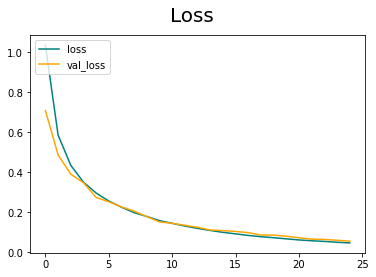

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)
    unique2, counts2 = np.unique(y, return_counts=True)
    dict(zip(unique2, counts2))
    # print (yhat)
    # print (y)

print (pred)

unique2, counts2 = np.unique(pred, return_counts=True)
dict(zip(unique2, counts2))

noInBatch= (len(pred))


[1 3 3 3 3 0 1 2 2 0 0 3 3 2 0 2 2 2 2 2 2 2 2 1 3 3 3 2 2 3 3 3 1 3 2 1 0
 2 2 2 3 2 1 2 3 0 3 0 0 2 3 2 1 3 3 1 3 0 3 1 2 2 2 3 3 0 2 0 3 0 3 0 2 2
 2 2 0 0 2 0 0 1 1 1 2 3 2 3 0 2 2 1 3 3 1 1 1 1 1 3 0 3 3 1 0 0 0 2 0 3 2
 2 3 2 0 0 2 3 2 3]


In [35]:
stats = dict(zip(unique2, counts2))
print (stats)

nbrBlotch = stats[0]
nbrNormal = stats[1]
nbrRot = stats[2]
nbrScab = stats[3]
nbrRej = int(nbrBlotch)+int(nbrRot)+int(nbrScab)

percBlotch = int(nbrBlotch)/int(noInBatch)*100
percNormal = int(nbrNormal)/int(noInBatch)*100
percRot = int(nbrRot)/int(noInBatch)*100
percScab = int(nbrScab)/int(noInBatch)*100
percRej = int(nbrRej)/int(noInBatch)*100

if noInBatch != 120:
    
    print ("Please offer a batch of 80 apples for a correct quality control")

else:
    if nbrNormal >= 119: #79:                                          
        batchStatus = (f'The batch has been qualified as: Class 1\n , this is suitable for supermarkets and greengrocers.')
    elif nbrNormal >= 112: #75:
        batchStatus = (f'The batch has been qualified as: Class 2\n , this is suitable to be used in apple sauce.')
    elif nbrNormal >= 109: #73:
         (f'The batch has been qualified as: Class 3\n, this is suitable to be used in apple syrup.')
    else:
        batchStatus = (f'The batch has been rejected\n, this is too bad for you.')
    
print (batchStatus)

print (noInBatch)
print (percRej)

{0: 25, 1: 19, 2: 40, 3: 36}
The batch has been rejected
, this is too bad for you.
120
84.16666666666667


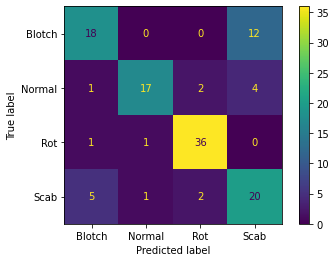

In [36]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [37]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.7830 - acc: 0.7583


# save and test load model

In [38]:
model.save(os.path.join('models','appleclassifier73transferaugopt.h5'))

my_reloaded_model = tf.keras.models.load_model(
       (path),
custom_objects={'KerasLayer':hub.KerasLayer}

In [39]:
my_reloaded_model = tf.keras.models.load_model(
       ('./models/appleclassifier73transferaugopt.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer})

In [40]:
my_reloaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
resize = tf.image.resize(img, (224,224))

In [42]:
yhat_new = my_reloaded_model.predict(np.expand_dims(resize/255, 0))

In [43]:
pred_new = np.argmax(yhat_new, axis=-1)

In [44]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with rot


Nog doen - zorgen dat de modellen onder de juiste namen worden opgeslagen
Thesis lezen voordat ik conclusies schrijf

split 90/10

(c) Inceptionv3
(e) MobileNetv2.

t.a.v. de png's die niet lekker werken:

Libpng-1.6 is more stringent about checking ICC profiles than previous versions. You can ignore the warning. To get rid of it, remove the iCCP chunk from the PNG image.

Some applications treat warnings as errors; if you are using such an application you do have to remove the chunk. You can do that with any of a variety of PNG editors such as ImageMagick's

convert in.png out.png
To remove the invalid iCCP chunk from all of the PNG files in a folder (directory), you can use mogrify from ImageMagick:

mogrify *.png
This requires that your ImageMagick was built with libpng16. You can easily check it by running:

convert -list format | grep PNG
If you'd like to find out which files need to be fixed instead of blindly processing all of them, you can run

pngcrush -n -q *.png
where the -n means don't rewrite the files and -q means suppress most of the output except for warnings. Sorry, there's no option yet in pngcrush to suppress everything but the warnings.

Binary Releases of ImageMagick are here

For Android Projects (Android Studio) navigate into res folder.

For example:

C:\{your_project_folder}\app\src\main\res\drawable-hdpi\mogrify *.png